In [53]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [554]:
# starting of generating random points for linear regression
# eqn : y = mx + c
# choosing 10 points

n = 20
reg_m = 3
x_arr = [random.randrange(0,n) for i in range(0,n)]
y_arr = [get_y_linear(i, reg_m) for i in x_arr]


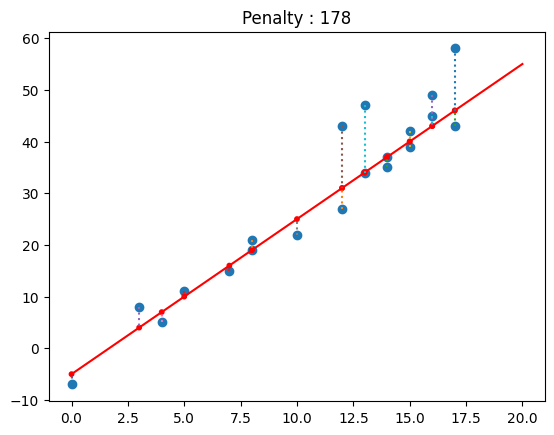

In [278]:
def get_y_linear(x : int, m : int) -> int:
    c = random.randrange(0-m*3,m*3) #variation
    y = m*x + c
    return y


guessed_m = 3
guessed_c = -5
guessed_eqn = guessed_m*x+guessed_c
y_data_for_guessed_eqn = [guessed_m*x+guessed_c for x in x_arr]

fig = plt.figure()
ax = plt.axes()

ax.scatter(x_arr, y_arr)

x = np.linspace(0, n, )
ax.plot(x, guessed_eqn, color='red')
ax.scatter(x_arr, y_data_for_guessed_eqn, color = 'red', s=[10 for i in range(n)])

sum, err = get_l1_regression(x_arr, y_arr, guessed_m, guessed_c)

for i in range(0, len(y_arr)):
    ax.plot([x_arr[i],x_arr[i] ], [y_arr[i], y_data_for_guessed_eqn[i]], linestyle=':' )

plt.title(f"Penalty : {sum}")
plt.show()

In [ ]:
#in linear equation the penalty using L1 regression is calculates as:
# sum of absolute values of |y - (mx + c)| where x and y = points

def get_l1_regression(x_arr, y_arr, guessed_m, c):
    sum = 0
    err_values = []
    for i in range(len(x_arr)):
        err = abs(y_arr[i] - guessed_m*x_arr[i] + c )
        err_values.append(err)
        sum += err

    return sum, err_values

get_l1_regression(x_arr, y_arr, m, c)

(80, [7, 10, 7, 11, 9, 4, 6, 10, 10, 6])

# non linear curve regression 

In [281]:
import math

In [619]:
n = 10
noise = 1
x_arr = [i/10 for i in range(0,n)]
y_arr = [get_sine(i, reg_m) for i in x_arr]

def get_sine(x, noise):
    c = random.randrange(0-noise,noise) #variation
    val =   math.sin(2*math.pi * x + c/10) 
    return val


Best Round:
[5000, 0.42478762893927435, [-0.015405152877775441, 0.02132992569670683, -0.007590872534354143, 0.0004564527974568744], [8.103716766665952, -14.700683734108221, 5.410605239088933, 0.07881091828558415], [0.07885656356532983, 0.48095784758487226, 0.6377011742819125, 0.5976996011647202, 0.4095661857415636, 0.12191398552071303, -0.21664394198956377, -0.5574945392809985, -0.8520247488453199, -1.0516215131742583]]


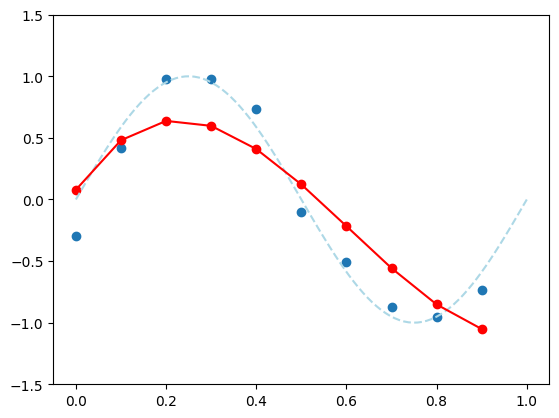

In [641]:
fig = plt.figure()
ax = plt.axes()

ax.set_ylim(-1.5, 1.5)

x = np.linspace(0, 1, 100)
ax.plot(x,  np.sin(2*math.pi*x), linestyle='dashed', color='#ADD8E6') #orgininl equation

plt.scatter(x=x_arr, y=y_arr)

round, err_sum, wts, y_pred = get_equation(3, 5000, x_arr, y_arr,  learning_rate=1e-1)
plt.plot(x_arr, y_pred, color='red')
plt.scatter(x_arr, y_pred, color = 'red')

In [ ]:
def get_equation(order_of_polynomial, training_rounds, x_arr, target_arr,  learning_rate=0.001):
    sum = 0
    # we get error value by half of sum of ((y, coefficients)-target)**2, but how do we decide what coefficients to use
    # and (y, coefficients) = sum of wj*xj, till M, M is the order of the polynomial 
    # in the ppt, M=0, M=1 gave no results as such, but as the m value increased, we got accurate curves,
    # so similar to how adjust the m and c value in linear, we have to predict the w values? 
    # iterating it and testing which values hit lower error rate? ig this is what it means by training. 
    # here, it says 
    # "This can be done by minimizing an error function that measures the misfit between the function y(x,w), for any 
    # given value of w, and the training set data points."" in ppt

    #initialising coeffs as random
    w = [random.random() for i in range(order_of_polynomial+1)]

    return_arr = []


    for n in range(training_rounds):
        y_x_w = get_y_x_w_for_x_arr(w=w, x_arr=x_arr, order_of_polynomial=order_of_polynomial, ) #now we have y_x_w values for every x in the x_arr
        error_vals = []
        # next is to get error value:
        errors = [y_x_w[i] - target_arr[i] for i in range(len(target_arr))]
        sum_of_squares = 0
        for e in errors:
            sum_of_squares += e**2

        error = 0.5 * sum_of_squares
        if error > 1e6:
            print("Diverging! stopping early.")
            break


        # i started with this method to modify weights, but 
        # for j in range(len(w)):
        #     w[j] -= random.random() 

        # but then i did some digging online and saw have to take gradient, which is like derivative of the error function we had
        # which basically tells what direction to take step in and, i added a parameter in get equation "learning rate" which dictates
        # how big of a step should we take
        grads = [0 for _ in range(len(w))]
        for j in range(len(w)):
            grad_sum = 0
            for i in range(len(x_arr)):
                # derivative of (1/2)*(y - t)^2 wrt w_j  => (y - t)*x^power
                power = order_of_polynomial - j
                grad_sum += errors[i] * (x_arr[i] ** power)
            grads[j] = grad_sum
        
        #and now we update the weights:
        for j in range(len(w)):
            w[j] -= learning_rate * grads[j]

        # print(f"Round {n+1:>3} | Error: {error:>10.4f} | Weights: {w} | Predictions: {y_x_w}")

        return_arr.append([n+1, error, grads, w.copy(), y_x_w])
        
    best = min(return_arr, key=lambda x: x[1])
    print("\nBest Round:")
    print(best)
    return best[0], best[1], best[2], best[-1]
        
    

    # the goal is to minimise the error value, now x data points & target points are fixed, we need to modify weights.
    # one way i could think of to test of weights affect values is to add respective error vals to weights 

def get_y_x_w_for_x_arr(w, x_arr, order_of_polynomial):
    y_x_w = []
    for x in x_arr: #so for every value in x
        sum_of_w_x_m = 0
        power = order_of_polynomial
        for w_ in w: # we are multiplying each value of x power (m) with weights w, and value of m increases every round
            prod = w_ * x**power 
            power -= 1
            
            sum_of_w_x_m += prod
        y_x_w.append(sum_of_w_x_m)
    
    return y_x_w
        

get_equation(1, 5, [1,2,3,5], [1,2,3,9])




Best Round:
[5, 25.99355067808111, [-41.25231993019939, -9.391569087179484], [0.3069088981638211, 0.680943707149849], [0.9372087162962912, 1.202865294529913, 1.4685218727635345, 1.999835029230778]]


(5,
 25.99355067808111,
 [-41.25231993019939, -9.391569087179484],
 [0.9372087162962912,
  1.202865294529913,
  1.4685218727635345,
  1.999835029230778])